# Rad Lab

J305 (107 mm) Geiger-Müller tube simulations

© 2025 by Gissio

## Settings

In [1]:
detector_geometry = "data/geometry.toml"
detector_label = "J305 (107 mm)"
N_montecarlo = 1000000

## Detector geometry

![J305 Geometry](data/geometry.png)

In [2]:
import sys
if '../../tools' not in sys.path:
    sys.path.append('../../tools')

import radlab

# %matplotlib widget

source_area = radlab.get_source_area(detector_geometry)

## Detector efficiency

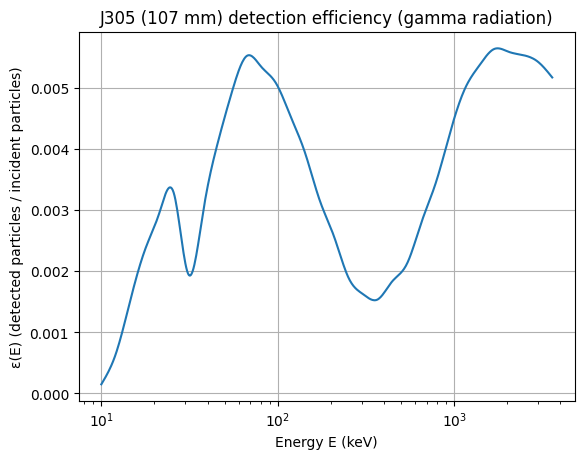

In [3]:
energies, efficiencies = radlab.simulate_gm_energies(
    detector_geometry, N_montecarlo)

radlab.plot_semilogx(f'{detector_label} detection efficiency (gamma radiation)',
                     energies, efficiencies, "ε(E) (detected particles / incident particles)")

## Ambient dose equivalent sensitivity

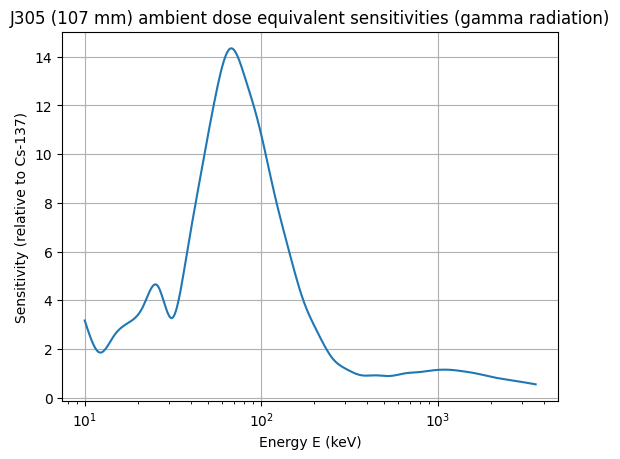

In [4]:
ambient_dose_equivalent_sensitivities = radlab.calculate_ambient_dose_equivalent_sensitivities(
    energies, efficiencies, source_area)

radlab.plot_semilogx(f'{detector_label} ambient dose equivalent sensitivities (gamma radiation)',
                     energies, ambient_dose_equivalent_sensitivities, "Sensitivity (relative to Cs-137)", normalize_cs137=True)

## Angular response

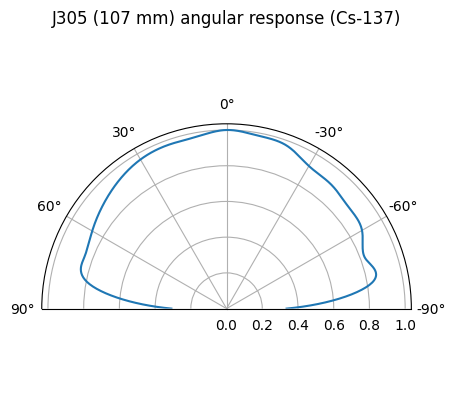

In [5]:
angles, angular_response = radlab.simulate_gm_angles(
    detector_geometry, N_montecarlo)

radlab.plot_polar(
    f'{detector_label} angular response (Cs-137)', angles, angular_response)

## Sensitivity for various sources

In [6]:
source_sensitivities = radlab.calculate_source_sensitivities(
    energies, ambient_dose_equivalent_sensitivities)

radlab.print_source_sensitivities(source_sensitivities)

| Source | Sensitivity (cpm/µSv/h) | Relative sensitivity (Cs-137) |
|-|-|-|
| Cs-137 | 135.816 | 1.000 |
| Co-60 | 151.935 | 1.119 |
| Tc-99m | 862.404 | 6.350 |
| I-131 | 132.068 | 0.972 |
| Lu-177 | 479.881 | 3.533 |
| Am-241 | 1620.999 | 11.935 |
| Radium | 143.461 | 1.056 |
| Uranium ore | 162.381 | 1.196 |
| Uranium glaze | 182.168 | 1.341 |
| Depleted uranium | 180.229 | 1.327 |
| Thorium ore | 149.629 | 1.102 |
| X-ray tube (60 kV) | 741.516 | 5.460 |
| K-40 | 143.638 | 1.058 |
| Natural background | 181.248 | 1.335 |
